In [18]:
#Import libraries 

from bs4 import BeautifulSoup
import requests 
import smtplib
import time
import datetime


In [19]:
# Connect to Website and pull in data
URL = 'https://www.amazon.com/gp/product/B07FNW9FGJ/ref=ewc_pr_img_1?smid=ATVPDKIKX0DER&psc=1&customizationToken=MC_Assembly_1%23B0752XJYNL&customId=B0752XJYNL'

headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36"}

page = requests.get(URL, headers = headers)

<!DOCTYPE html>

<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us">
<!-- sp:feature:head-start -->
<head>
<script>
   var aPageStart = (new Date()).getTime();
  </script>
<meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.sli
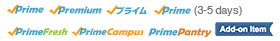

In [36]:
soup1 = BeautifulSoup(page.content, "html.parser")

soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

print(soup2)

In [64]:
#Item name
if soup2.find(id="productTitle"):
    title = soup2.find(id="productTitle").get_text()
else:
    title = soup2.find('span','a-size-large product-title-word-break').text
    
print(title)


                   Funny Got Data MIS Data Systems Business Analyst T-Shirt
                  


In [43]:
#print item price
if soup2.find(id="priceblock_ourprice"):
    price = soup2.find(id="priceblock_ourprice").get_text()
else: 
    price = soup2.find('span', 'a-offscreen').text
# or you can say price = soup2.find(class_='a-offscreen').text    

print(title)
print(price)
# If id = "priceblock-ourprice" isn't visible on Amazon html, search for class_="a-offscreen" as an alternative to find the price


Funny Got Data MIS Data Systems Business Analyst T-Shirt

                  $16.99
                 


In [44]:
# Clean up the data a little bit

price = price.strip()[1:]
title = title.strip()

print(price)
print(title)
type(price)

16.99
Funny Got Data MIS Data Systems Business Analyst T-Shirt


str

In [45]:
import datetime 

today = datetime.date.today()

print(today)

2022-07-14


In [46]:
# Create csv file to store pricing
import csv

header = ['Title', 'Price', 'Date']
data = [title, price, today]

with open('AmazonWebScraperDataset.csv', 'w', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

type(data)

list

In [47]:
#Import csv created and create a dataframe

import pandas as pd 

df = pd.read_csv(r'C:\Users\senay\AmazonWebScraperDataset.csv')

print(df)

                                               Title  Price        Date
0  Funny Got Data MIS Data Systems Business Analy...  16.99  2022-07-14


In [48]:
#Now we append data to the csv 

with open('AmazonWebScraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(data)

In [89]:
#Automate data

#Combine all of the above code into one function

def check_price():
    
    URL = 'https://www.amazon.com/gp/product/B07FNW9FGJ/ref=sw_img_1?smid=ATVPDKIKX0DER&customId=B0752XJYNL&th=1&psc=1'

    headers = { "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.5060.114 Safari/537.36 Edg/103.0.1264.49"}

    page = requests.get(URL, headers = headers)

    soup1 = BeautifulSoup(page.content, "html.parser")

    soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

    if soup2.find(id="productTitle"):
        title = soup2.find(id='productTitle').get_text(strip=True)
    else:
        title = soup2.find('span','a-size-large product-title-word-break').text


    if soup2.find(id="priceblock_ourprice"):
        price = soup2.find(id="priceblock_ourprice").get_text()
    else: 
        price = soup2.find('span', 'a-offscreen').text
    
    price = price.strip()[1:]
    title = title.strip()
    
    import datetime 

    today = datetime.date.today()
    
    import csv

    header = ['Title', 'Price', 'Date']
    data = [title, price, today]
    
    with open('AmazonWebScraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)

In [ ]:
# Runs check_price after a set time and inputs data into your CSV
while(True):
    check_price()
    time.sleep(86400)

In [87]:
import pandas as pd 

df = pd.read_csv(r'C:\Users\senay\AmazonWebScraperDataset.csv')

print(df)

                                               Title  Price        Date
0  Funny Got Data MIS Data Systems Business Analy...  16.99  2022-07-14
1  Funny Got Data MIS Data Systems Business Analy...  16.99  2022-07-14
2  Funny Got Data MIS Data Systems Business Analy...  16.99  2022-07-14


In [ ]:
# If uou want to try sending yourself an email (just for fun) when a price hits below a certain level you can try it
# out with this script

def send_mail():
    server = smtplib.SMTP_SSL('smtp.gmail.com',465)
    server.ehlo()
    #server.starttls()
    server.ehlo()
    server.login('senayabalema@gmail.com','xxxxxxxxxxxxxx')
    
    subject = "The Shirt you want is below $15! Now is your chance to buy!"
    body = "Senay, You're just in luck!!! Pick up the shirt of your dreams ASAP!!! Link here: https://www.amazon.com/gp/product/B07FNW9FGJ/ref=ewc_pr_img_1?smid=ATVPDKIKX0DER&psc=1&customizationToken=MC_Assembly_1%23B0752XJYNL&customId=B0752XJYNL'
   
    msg = f"Subject: {subject}\n\n{body}"
    
    server.sendmail(
        'senayabalema@gmail.com',
        msg
     
    )